Question: A critical analysis on the accuracy of the associated characteristics of MBTI personality types: How does online behaviour correspond to MBTI analyses?

In [ ]:
import pandas as pd

In [ ]:
import re

In [ ]:
df = pd.read_csv("mbti_1_1.csv", encoding='utf-8')
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


In [ ]:
df.posts = df['posts'].str.lower()

In [ ]:
df.posts = df['posts'].replace(to_replace=r'[^\w\s]', value='', regex=True)

In [ ]:
print(df['posts'])

0       httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediat...
1       im finding the lack of me in these posts very ...
2       good one  _____   httpswwwyoutubecomwatchvfhig...
3       dear intp   i enjoyed our conversation the oth...
4       youre firedthats another silly misconception t...
                              ...                        
8670    httpswwwyoutubecomwatchvt8edhb_h908ixfp just b...
8671    soif this thread already exists someplace else...
8672    so many questions when i do these things  i wo...
8673    i am very conflicted right now when it comes t...
8674    it has been too long since i have been on pers...
Name: posts, Length: 8675, dtype: object


In [ ]:
#has it in lower case and each word has been separated in to elements of a list
#how to separate each word into its own column?
unfiltered_table = pd.read_csv('mbti_1_1.csv')
unfiltered_table["posts"] = df["posts"].str.lower()
unfiltered_table["posts"] = unfiltered_table["posts"].str.split()
unfiltered_table

,type,posts
0,INFJ,[httpwwwyoutubecomwatchvqsxhcwe3krwhttp41media...
1,ENTP,"[im, finding, the, lack, of, me, in, these, po..."
2,INTP,"[good, one, _____, httpswwwyoutubecomwatchvfhi..."
3,INTJ,"[dear, intp, i, enjoyed, our, conversation, th..."
4,ENTJ,"[youre, firedthats, another, silly, misconcept..."
...,...,...
8670,ISFP,"[httpswwwyoutubecomwatchvt8edhb_h908ixfp, just..."
8671,ENFP,"[soif, this, thread, already, exists, someplac..."
8672,INTP,"[so, many, questions, when, i, do, these, thin..."
8673,INFP,"[i, am, very, conflicted, right, now, when, it..."


1) Create 16 different tables/ lists for each MBTI types
- see which words are most frequently used
- dictionary for storing words and number of times used?

### One Hot Encoding

In [ ]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
    
    array = np.zeros([1, len(texts)])
    for i in words:
        x = texts.str.contains(i).astype(int).values
        array = np.vstack((array, x))
    array = array[1:].astype(int)
    indicator_array = np.transpose(array)
    return indicator_array



### Example with 3 words

In [ ]:
# example with 3 words
import numpy as np
words_bag = ['hello', 'i', 'dear']
array_data = words_in_texts(words_bag, df['posts'])
data = pd.DataFrame(data = array_data, columns = words_bag)
data['type'] = df['type']
data

,hello,i,dear,type
0,1,1,1,INFJ
1,1,1,0,ENTP
2,1,1,0,INTP
3,0,1,1,INTJ
4,0,1,0,ENTJ
...,...,...,...,...
8670,0,1,0,ISFP
8671,0,1,1,ENFP
8672,0,1,0,INTP
8673,0,1,0,INFP


In [ ]:
posts_column = unfiltered_table['posts']
posts_column.iloc[0]

['httpwwwyoutubecomwatchvqsxhcwe3krwhttp41mediatumblrcomtumblr_lfouy03pma1qa1rooo1_500jpgenfp',
 'and',
 'intj',
 'moments',
 'httpswwwyoutubecomwatchviz7le1g4xm4',
 'sportscenter',
 'not',
 'top',
 'ten',
 'plays',
 'httpswwwyoutubecomwatchvucdfze1etec',
 'prankswhat',
 'has',
 'been',
 'the',
 'most',
 'lifechanging',
 'experience',
 'in',
 'your',
 'lifehttpwwwyoutubecomwatchvvxzeywwrdw8',
 'httpwwwyoutubecomwatchvu8ejam5dp3e',
 'on',
 'repeat',
 'for',
 'most',
 'of',
 'todaymay',
 'the',
 'perc',
 'experience',
 'immerse',
 'youthe',
 'last',
 'thing',
 'my',
 'infj',
 'friend',
 'posted',
 'on',
 'his',
 'facebook',
 'before',
 'committing',
 'suicide',
 'the',
 'next',
 'day',
 'rest',
 'in',
 'peace',
 'httpvimeocom22842206hello',
 'enfj7',
 'sorry',
 'to',
 'hear',
 'of',
 'your',
 'distress',
 'its',
 'only',
 'natural',
 'for',
 'a',
 'relationship',
 'to',
 'not',
 'be',
 'perfection',
 'all',
 'the',
 'time',
 'in',
 'every',
 'moment',
 'of',
 'existence',
 'try',
 'to',


### Apply to all words

Bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
tokenizer = CountVectorizer(stop_words = 'english')
test = posts_column.iloc[0]
tokenizer.fit(test)
text = pd.Series(df['posts'].iloc[0])
words = list(tokenizer.get_feature_names())

Clean the bag of words

In [ ]:
def clean_words(word):
    word = [x for x in word if (len(x) < 25 and len(x) > 1)]
    word = pd.Series(word)
    word = word.str.findall(r"^[a-zA-Z]+$").to_list()
    word = list(filter(None, word))
    word = [item for sublist in word for item in sublist]
    return word
words = clean_words(words)

Create a vector for all clean words

In [ ]:
array_data = words_in_texts(words, df['posts'])
data = pd.DataFrame(data = array_data, columns = words)
data['type'] = df['type']
data

,ages,ago,alternativebasically,appears,area,artist,artists,asa,avid,baby,...,workin,world,worry,xbox,ya,years,yepahh,youre,youthe,youve
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8670,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
8671,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
8672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
8673,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


Sentence encoding

In [ ]:
for (s,r) in zip(test, tokenizer.transform(test)):
    print(s)
    print(r)
    print('---')

someone

---
out

---
there

---
for

---
everyonewait
  (0, 64)	1
---
i

---
thought
  (0, 217)	1
---
confidence
  (0, 35)	1
---
was

---
a

---
good
  (0, 80)	1
---
thingi
  (0, 213)	1
---
just
  (0, 115)	1
---
cherish
  (0, 27)	1
---
the

---
time
  (0, 220)	1
---
of

---
solitude
  (0, 199)	1
---
bc
  (0, 16)	1
---
i

---
revel
  (0, 180)	1
---
within

---
my

---
inner
  (0, 110)	1
---
world
  (0, 243)	1
---
more

---
whereas

---
most

---
other

---
time
  (0, 220)	1
---
id
  (0, 105)	1
---
be

---
workin
  (0, 242)	1
---
just
  (0, 115)	1
---
enjoy
  (0, 62)	1
---
the

---
me

---
time
  (0, 220)	1
---
while

---
you

---
can

---
dont
  (0, 54)	1
---
worry
  (0, 244)	1
---
people
  (0, 157)	1
---
will

---
always

---
be

---
around

---
toyo
  (0, 225)	1
---
entp
  (0, 63)	1
---
ladies
  (0, 118)	1
---
if

---
youre
  (0, 249)	1
---
into

---
a

---
complimentary
  (0, 34)	1
---
personalitywell
  (0, 161)	1
---
hey
  (0, 93)	1
---
when

---
your

---
main
  (0, 131)	1
---
soc

In [ ]:
posts_column = df["posts"]
posts_column.iloc[0]
from sklearn.feature_extraction.text import CountVectorizer
tokenizer = CountVectorizer(stop_words = 'english')
tokenizer.fit(posts_column)
print("Words kept:", list(enumerate(tokenizer.get_feature_names())))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Model with Random Forest or Decision 3 (but random forest is better)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 350)
from sklearn import metrics
x = data[list(data)[:-1]]


In [ ]:
personalities = pd.get_dummies(data['type'])
y = data['type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state = 5)

In [ ]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x)

ValueError: could not convert string to float: 'INTJ'

In [ ]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y, y_pred))

In [ ]:
#X=dataset[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
#y=dataset['species']  # Labels

## Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

Splitting into Test set (One of the personality types)

In [ ]:
def get_test_set(dataset, personality_type):
    return dataset.loc[dataset['type'] == personality_type]
get_test_set(data, 'ESTJ')

In [ ]:

import pandas as pd
feature_imp = pd.Series(clf.feature_importances_, index = list(data)[:-1]).sort_values(ascending = True)
feature_imp




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 350)
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y, y_pred))

In [ ]:
#here i copied and pasted the cell soemone else did above (ty!) 
#and tweaked some things to see if i could make a bigger matrix

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100)
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y, y_pred))

In [ ]:
len(y_test)

In [ ]:
y_predicted = clf.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Insert cross validation to make sure our model does not overfit


Partial Credit

In [ ]:
personalities = list(data['type'])
def get_new_column(name, index):
    new_column_values = []
    for personality in personalities:
        new_column_values.append(personality[index])
    data[name] = new_column_values
get_new_column('i_or_e', 0)
get_new_column('n_or_s', 1)
get_new_column('t_or_f', 2)
get_new_column('j_or_p', 3)
data

General test against all 4 domains

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 350)
from sklearn import metrics
x = data[list(data)[:-5]]
personalities = pd.get_dummies(data['type'])
y = data['type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Test against i_or_e

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 350)
from sklearn import metrics
x = data[list(data)[:-5]]
personalities = pd.get_dummies(data['type'])
y = data['i_or_e']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Test against n_or_s

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 350)
from sklearn import metrics
x = data[list(data)[:-5]]
personalities = pd.get_dummies(data['type'])
y = data['n_or_s']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Test against t_or_f

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 350)
from sklearn import metrics
x = data[list(data)[:-5]]
personalities = pd.get_dummies(data['type'])
y = data['t_or_f']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 350)
from sklearn import metrics
x = data[list(data)[:-5]]
personalities = pd.get_dummies(data['type'])
y = data['j_or_p']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.70, random_state = 5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y, y_pred))

Visualizations

In [ ]:
#just to see all of them
unfiltered_table

,type,posts
0,INFJ,[httpwwwyoutubecomwatchvqsxhcwe3krwhttp41media...
1,ENTP,"[im, finding, the, lack, of, me, in, these, po..."
2,INTP,"[good, one, _____, httpswwwyoutubecomwatchvfhi..."
3,INTJ,"[dear, intp, i, enjoyed, our, conversation, th..."
4,ENTJ,"[youre, firedthats, another, silly, misconcept..."
...,...,...
8670,ISFP,"[httpswwwyoutubecomwatchvt8edhb_h908ixfp, just..."
8671,ENFP,"[soif, this, thread, already, exists, someplac..."
8672,INTP,"[so, many, questions, when, i, do, these, thin..."
8673,INFP,"[i, am, very, conflicted, right, now, when, it..."


In [ ]:
# does year equals to 2002?
# is_ENFP is a boolean variable with True or False in it
is_enfp =  unfiltered_table['type']=='ENFP'
print(is_enfp.head())


0    False
1    False
2    False
3    False
4    False
Name: type, dtype: bool


In [ ]:
# filter rows for type ENFP using  the boolean variable
ENFP_table = unfiltered_table[is_enfp]
#print(ENFP_table.head())
ENFP_table


,type,posts
26,ENFP,"[he, doesnt, want, to, go, on, the, trip, with..."
38,ENFP,"[hey, enfps, ive, posted, this, thread, on, th..."
72,ENFP,"[85307, my, brothers, and, i, im, on, the, far..."
99,ENFP,"[learning, to, say, no, the, right, way, is, t..."
102,ENFP,"[i, know, right, over, a, year, old, now, fuck..."
...,...,...
8617,ENFP,"[thank, you, i, look, forward, to, connecting,..."
8620,ENFP,"[i, seriously, relate, to, this, struggle, it,..."
8627,ENFP,"[hey, happy, to, meet, you, too, but, where, d..."
8659,ENFP,"[leoni, i, had, really, bad, social, anxiety, ..."


In [ ]:
word_list = ENFP_table.posts.sum()
word_list

['he',
 'doesnt',
 'want',
 'to',
 'go',
 'on',
 'the',
 'trip',
 'without',
 'me',
 'so',
 'me',
 'staying',
 'behind',
 'wouldnt',
 'be',
 'an',
 'option',
 'for',
 'him',
 'i',
 'think',
 'he',
 'really',
 'does',
 'believe',
 'that',
 'im',
 'the',
 'one',
 'being',
 'unreasonable',
 'he',
 'still',
 'continues',
 'to',
 'say',
 'thatim',
 'still',
 'completely',
 'in',
 'awe',
 'and',
 'im',
 'amazed',
 'that',
 'he',
 'doesnt',
 'think',
 'twice',
 'about',
 'leaving',
 'one',
 'of',
 'them',
 'and',
 'how',
 'that',
 'will',
 'make',
 'them',
 'feel',
 'he',
 'said',
 'he',
 'wants',
 'to',
 'tell',
 'them',
 'that',
 'im',
 'not',
 'willing',
 'to',
 'work',
 'extra',
 'forthanks',
 'everyone',
 'im',
 'struggling',
 'with',
 'being',
 'selfish',
 'and',
 'not',
 'just',
 'going',
 'ahead',
 'and',
 'working',
 'to',
 'pay',
 'for',
 'the',
 'rest',
 'i',
 'dont',
 'want',
 'my',
 'husband',
 'to',
 'feel',
 'unloved',
 'or',
 'like',
 'i',
 'dont',
 'care',
 'about',
 'his',
 

In [ ]:
word_list

['he',
 'doesnt',
 'want',
 'to',
 'go',
 'on',
 'the',
 'trip',
 'without',
 'me',
 'so',
 'me',
 'staying',
 'behind',
 'wouldnt',
 'be',
 'an',
 'option',
 'for',
 'him',
 'i',
 'think',
 'he',
 'really',
 'does',
 'believe',
 'that',
 'im',
 'the',
 'one',
 'being',
 'unreasonable',
 'he',
 'still',
 'continues',
 'to',
 'say',
 'thatim',
 'still',
 'completely',
 'in',
 'awe',
 'and',
 'im',
 'amazed',
 'that',
 'he',
 'doesnt',
 'think',
 'twice',
 'about',
 'leaving',
 'one',
 'of',
 'them',
 'and',
 'how',
 'that',
 'will',
 'make',
 'them',
 'feel',
 'he',
 'said',
 'he',
 'wants',
 'to',
 'tell',
 'them',
 'that',
 'im',
 'not',
 'willing',
 'to',
 'work',
 'extra',
 'forthanks',
 'everyone',
 'im',
 'struggling',
 'with',
 'being',
 'selfish',
 'and',
 'not',
 'just',
 'going',
 'ahead',
 'and',
 'working',
 'to',
 'pay',
 'for',
 'the',
 'rest',
 'i',
 'dont',
 'want',
 'my',
 'husband',
 'to',
 'feel',
 'unloved',
 'or',
 'like',
 'i',
 'dont',
 'care',
 'about',
 'his',
 

In [ ]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(word_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

TypeError: expected string or bytes-like object

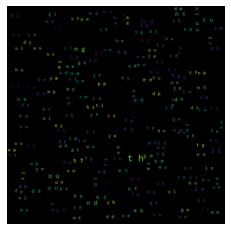

In [ ]:
!pip install wordcloud
# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create a list of word
word_list
# empty string is declare 
text = "" 
  
# iterating through list of rows 
for row in word_list : 
      
    # iterating through words in the row 
    for word in row : 
  
        # concatenate the words 
        text = text + " " + word 
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

